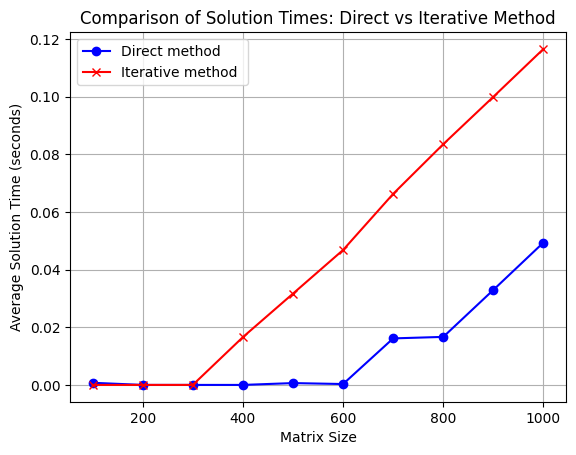

In [1]:
import numpy as np
from time import *
import matplotlib.pyplot as plt


def jacobi(A, b, niteraci):
    x=np.ones(len(A))
    D = np.diag(A)  
    L = np.tril(A, k=-1)  
    U = np.triu(A, k=1)   
    
    for i in range(niteraci):
        x = (b - np.matmul((L + U), x)) / D  
        
    
    return x

def measure_time(matrix_size):
    a = np.random.rand(matrix_size, matrix_size)  
    b = np.random.rand(matrix_size)   
     
    
    start_time = time()
    np.linalg.solve(a, b)  
    end_time = time()
    direct_time = end_time - start_time
    
    start_time1 = time()
    jacobi(a, b, 25)  
    end_time1 = time()
    iterative_time = end_time1 - start_time1
    
    return direct_time, iterative_time

matrix_sizes = range(100, 1001, 100)
direct_times = []
iterative_times = []

for size in matrix_sizes:
    direct_time, iterative_time = measure_time(size)
    direct_times.append(direct_time)
    iterative_times.append(iterative_time)


plt.plot(matrix_sizes, direct_times, label='Direct method ', color='blue', marker='o')
plt.plot(matrix_sizes, iterative_times, label='Iterative method ', color='red', marker='x')

plt.title('Comparison of Solution Times: Direct vs Iterative Method')
plt.xlabel('Matrix Size')
plt.ylabel('Average Solution Time (seconds)')
plt.legend()
plt.grid(True)
plt.show()
